# Rendering a Mosaic of a Large Area

We start by fetching the shape of Brandenburg from OpenStreetMap:

In [1]:
import sentinel_helpers
brandenburg = sentinel_helpers.search_osm('Brandenburg, Germany').iloc[:1]
brandenburg

,place_id,osm_type,osm_id,display_name,place_rank,category,type,importance,icon,geometry
0,257410307,relation,62504,"Brandenburg, Deutschland",8,boundary,administrative,0.766083,https://nominatim.openstreetmap.org/ui/mapicon...,"MULTIPOLYGON (((11.26623 53.12205, 11.26780 53..."


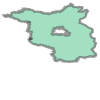

In [2]:
brandenburg.iloc[0]['geometry']

Due to the URL size constraint we simplify the shape of Brandenburg by creating its convex hull.
In this process we also remove the boundaries of Berlin, which form a hole in the middle of the shape.

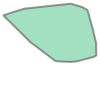

In [3]:
brandenburg_simple = brandenburg.convex_hull[0]
brandenburg_simple

We want to fetch exactly those products that help us stitch together an image of Brandenburg while not being excessively covered by clouds (see [01 Brandenburg Cover Research.ipynb]("01 Brandenburg Cover Research.ipynb") for more info).

In [4]:
from datetime import date
import datetime
import os

from sentinelsat import SentinelAPI
from tqdm.notebook import tqdm

end_date = date(2020,7,1)
start_date = end_date - datetime.timedelta(weeks=4)
footprint = brandenburg_simple.wkt
api = SentinelAPI(os.getenv('SCIHUB_USERNAME'), os.getenv('SCIHUB_PASSWORD'))
api._tqdm = tqdm # ← better progress bars


products = api.query(footprint,
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     date=(start_date, end_date))


print('Found ' + str(len(products)) + ' results')


Found 181 results


We want products with a cloud cover percentage below 50 percent covering all of Brandenburg.

In [5]:
gdf = api.to_geodataframe(products)
gdf = gdf[gdf['cloudcoverpercentage'] < 50]
gdf.head()

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",false,2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:45.202,26231,...,1.07 GB,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...,eb1fec8e-d933-48c3-99f2-c2b3731dc5a1,"MULTIPOLYGON (((12.18393 50.42971, 13.43099 50..."
a87c7ff5-8664-4002-9258-7b1508a1de78,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",false,2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:45.044,26231,...,1.07 GB,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...,a87c7ff5-8664-4002-9258-7b1508a1de78,"MULTIPOLYGON (((12.12921 51.32805, 13.70458 51..."
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",false,2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:20.244,26231,...,460.82 MB,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...,8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65,"MULTIPOLYGON (((13.56331 51.35443, 13.89039 51..."
7b322eaf-f037-4b4e-a918-d477d0a052ad,S2A_MSIL2A_20200630T102031_N0214_R065_T32UQC_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",false,2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:11:52.244,26231,...,1.07 GB,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T32UQC_2...,7b322eaf-f037-4b4e-a918-d477d0a052ad,"MULTIPOLYGON (((13.44210 51.27893, 13.53998 52..."
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVS_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",false,2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:10:52.180,26231,...,124.50 MB,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVS_2...,5c6ef9e1-8828-4d6d-8df4-7274e3b10e14,"MULTIPOLYGON (((13.58157 50.75469, 13.63555 50..."


In [6]:
brandenburg_geometry = brandenburg.iloc[0].geometry
for idx, product in tqdm(gdf.iterrows(), total=len(gdf)):
    union = gdf.loc[:idx].unary_union
    if union.contains(brandenburg_geometry):
        break

In [7]:
to_download = gdf.loc[:idx]

We don't want to download the same tile multiple times, keeping always the one with the smallest cloud cover.
If a tile is not entirely covered by clouds, you might make different tradeoff to get more recent tiles.

In [8]:
to_download = to_download.sort_values(by='cloudcoverpercentage').drop_duplicates(subset='geometry')
to_download

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
4c841fe7-7fa2-4d1e-9893-962dc4301a94,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",false,2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:04:38.113,26131,...,98.55 MB,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUU_2...,4c841fe7-7fa2-4d1e-9893-962dc4301a94,"MULTIPOLYGON (((12.04401 52.63310, 12.05737 52..."
93e7901a-94cb-41d2-b23f-780f2a6061a7,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",false,2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:10.949,26131,...,122.90 MB,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQD_2...,93e7901a-94cb-41d2-b23f-780f2a6061a7,"MULTIPOLYGON (((11.94274 52.44626, 11.97922 52..."
52c652ac-186f-4fd5-ba3d-e937299f7f73,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",false,2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:53.468,26131,...,1.05 GB,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPD_2...,52c652ac-186f-4fd5-ba3d-e937299f7f73,"MULTIPOLYGON (((11.82522 52.22730, 11.90169 52..."
feb890a1-b3b1-41e8-8c61-283ab92d0f8b,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQE_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",false,2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:20.540,26131,...,414.87 MB,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQE_2...,feb890a1-b3b1-41e8-8c61-283ab92d0f8b,"MULTIPOLYGON (((12.30821 53.11342, 12.37451 53..."
26d5cf3d-e238-4ecb-a60f-89a74f08c291,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUV_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",false,2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:04:56.168,26131,...,460.21 MB,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUV_2...,26d5cf3d-e238-4ecb-a60f-89a74f08c291,"MULTIPOLYGON (((12.01091 53.12365, 12.31702 53..."
ae2ff382-160d-449c-8856-d450fe861207,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPE_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",false,2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:56.690,26131,...,1.07 GB,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPE_2...,ae2ff382-160d-449c-8856-d450fe861207,"MULTIPOLYGON (((12.13532 53.11988, 12.20926 54..."
b64d4450-d999-41dc-9ecb-6d263f322dd3,S2B_MSIL2A_20200615T101559_N0214_R065_T33UUU_2...,https://sc

In [ ]:
# we create the directory structure we need for downloading our mosaic tiles
from pathlib import Path
output_dir = Path('input/brandenburg_mosaic')
output_dir.mkdir(exist_ok=True, parents=True)


print('Downloading {} files…'.format(len(to_download)))
products_subset = {idx: products[idx] for idx in to_download.index}
api._tqdm = tqdm # ← monkey-patch for nicer progress bar
downloaded, _, _ = api.download_all(products_subset, output_dir)
downloaded_paths = [d['path'] for d in downloaded.values()]

## Previewing Downloaded Files

In [ ]:
import rasterio as r
import rasterio.plot as rplt
import matplotlib.pyplot as plt

# preview the first downloaded image
with r.open(sentinel_helpers.scihub_band_paths(downloaded_paths[3], ['TCI'], '20m')[0]) as true_color:
    # we do not need
    fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
    rplt.show((true_color, 1), ax=axr, cmap='Reds', title='red channel')
    rplt.show((true_color, 2), ax=axg, cmap='Greens', title='green channel')
    rplt.show((true_color, 3), ax=axb, cmap='Blues', title='blue channel')
    plt.show()

In [ ]:
# plotting the included true-colo image
with r.open(sentinel_helpers.scihub_band_paths(downloaded_paths[3], ['TCI'], '20m')[0]) as true_color:
    # note that in order to get the real colors, we need to reverse the bands into "rasterio band order"
    plt.figure(figsize=(20,20))
    rplt.show(true_color.read(), transform=true_color.transform)
    plt.show()

## Creating a True-Color Mosaic

We need to reproject all tiles so they have the same projection.
The paths of these reprojected tiles will be saved in `reprojected_rasters`.

In [ ]:
%%time

from rasterio.merge import merge
from sentinel_helpers import RasterReaderList

from rasterio.warp import calculate_default_transform, reproject, Resampling
from tqdm.notebook import tqdm
from collections import Counter

# if this is set to None the most common crs of the downloaded products is used
target_crs = 'EPSG:25833'
reprojected_rasters = []

with RasterReaderList(sentinel_helpers.scihub_band_paths(f, ['TCI'], '20m')[0] for f in downloaded_paths) as to_merge:
    if not target_crs:
        most_common_crs, _ = Counter([str(f.crs) for f in to_merge]).most_common()[0]
        print('The most common CRS is', most_common_crs)
        target_crs = most_common_crs
    
    for src in tqdm(to_merge, desc='Reprojecting raster files…'):
        # only reproject if necessary
        if str(src.meta['crs']) == str(target_crs):
            reprojected_rasters.append(src)
            continue
        
        # create a temporary file to write the output to
        tmp_output = Path('/tmp/reprojected/') / target_crs / Path(src.name.replace('zip+file://', '').replace('.zip!', ''))
        tmp_path = tmp_output.parent
        ! mkdir -p {tmp_path}
        
        # this is mostly taken from https://rasterio.readthedocs.io/en/latest/topics/reproject.html
        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds)
        
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': target_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        
        with r.open(tmp_output, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=r.band(src, i),
                    destination=r.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=target_crs,
                    resampling=Resampling.nearest)
            reprojected_rasters.append(tmp_output)

We can combine all of the tiles into a single `np.array`:

In [ ]:
%%time
mosaic, mosaic_transform = merge([r.open(raster) for raster in reprojected_rasters])

The `mosaic_transform` is a matrix which helps when transforming array-coordinates into coordinates in the CRS as given by `target_crs`:

In [ ]:
mosaic_transform

The pixel at the top left (array position $(0, 0)$ represents the following pixel in the `target_crs`:

In [ ]:
mosaic_transform * (0, 0)

Plotting the merged tiles gives us the following result. The shape of Brandenburg is overlayed in white:

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,16))
rplt.show(mosaic, transform=mosaic_transform, ax=ax)
brandenburg.to_crs(target_crs).plot(ax=ax, facecolor='none', edgecolor='white')
plt.show()

By running `grep VmHWM /proc/$PID/status` we can find out the peak memory consumption of this process.
This memory consumption will not be identical and depend on garbage collector runs and other hard to predict factors.
The number below can therefore only be seen as a rough ballpark estimate:

```
mHWM:	 4876376 kB
```